## Build ML Model

---
> Use reduced by State data

In [1]:
# import general packages
import numpy as np
import pandas as pd
import src.scripts as src
import matplotlib.pyplot as plt
%matplotlib inline

# import ML packages
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, precision_recall_curve, auc, make_scorer, recall_score, accuracy_score, precision_score, confusion_matrix

In [2]:
# load data
# df_id_reduced = src.read_from_efs('df_id_reduced.csv')
X_reduced = src.read_from_efs('X_reduced.csv')
y_reduced = src.read_from_efs('y_reduced.csv')

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [3]:
print('X_reduced shape: ', X_reduced.shape)
X_reduced.head()

X_reduced shape:  (23052741, 15)


,generic_name,bene_count,total_claim_count,total_30_day_fill_count,total_day_supply,total_drug_cost,bene_count_ge65,total_claim_count_ge65,total_30_day_fill_count_ge65,total_day_supply_ge65,total_drug_cost_ge65,total_drug_cost_per_beneficiary,total_drug_cost_per_claim,total_drug_cost_per_beneficiary_ge65,total_drug_cost_per_claim_ge65
0,AMOXICILLIN,0.0,11,11.0,72,46.76,0.0,0.0,0.0,0.0,0.00,inf,4.250909,NaN,NaN
1,HYDROCODONE/ACETAMINOPHEN,16.0,23,23.0,57,81.51,0.0,0.0,0.0,0.0,0.00,5.094375,3.543913,NaN,NaN
2,SODIUM FLUORIDE,0.0,16,18.1,478,109.59,0.0,0.0,0.0,0.0,0.00,inf,6.849375,NaN,NaN
3,ACYCLOVIR,0.0,16,18.0,253,127.90,0.0,16.0,18.0,253.0,127.90,inf,7.993750,inf,7.993750
4,ALBUTEROL SULFATE,13.0,64,69.3,1467,3483.22,0.0,53.0,58.3,1291.0,3013.26,267.940000,54.425312,inf,56.853962


In [4]:
# clean nans and infs and convert to values
X = X_reduced.fillna(0).replace(np.inf, 0)

## Which `generic_names` are most procribed?
---
> It's reasonable to use `total_30_day_fill_count` and `total_30_day_fill_count_ge65`

In [16]:
generic_name_cnt = X.groupby('generic_name').agg('sum').reset_index()[['generic_name',
                                                                       'total_30_day_fill_count',
                                                                       'total_30_day_fill_count_ge65']]

generic_name_cnt['sum'] = generic_name_cnt['total_30_day_fill_count'] + generic_name_cnt['total_30_day_fill_count_ge65']

generic_name_cnt.sort_values(by='sum', ascending=False, inplace=True)
print('generic_name_cnt shape: ', generic_name_cnt.shape)
generic_name_cnt.head()
# B = A[['generic_name','bene_count','total_claim_count','total_30_day_fill_count','total_day_supply','total_drug_cost']]
# pd.plotting.scatter_matrix(B, figsize=(12,12))
# plt.show()

generic_name_cnt shape:  (1795, 4)


,generic_name,total_30_day_fill_count,total_30_day_fill_count_ge65,sum
927,LEVOTHYROXINE SODIUM,7.368918e+07,5.158430e+07,1.252735e+08
133,ATORVASTATIN CALCIUM,6.346173e+07,4.237178e+07,1.058335e+08
89,AMLODIPINE BESYLATE,6.271557e+07,4.093366e+07,1.036492e+08
946,LISINOPRIL,6.178761e+07,4.151178e+07,1.032994e+08
1537,SIMVASTATIN,6.088970e+07,4.020474e+07,1.010944e+08


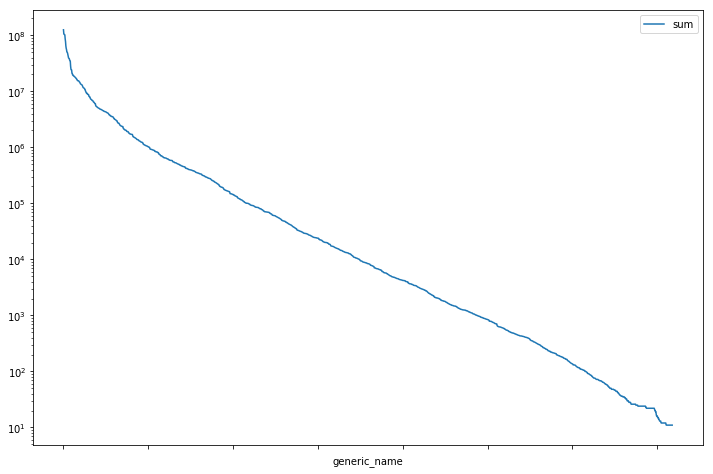

In [28]:
generic_name_cnt.plot('generic_name','sum', kind='line', logy=True, figsize=(12,8))
plt.show()

In [ ]:
# get dummies from `generic_name`
X_dummies = pd.get_dummies(X['generic_name'])
print('X_dummies shape: ', X_dummies.shape)
X_dummies.head()

In [ ]:
# convert X to np arrays
X1 = X.loc[:, X.columns != 'generic_name'].values
X2 = X_dummies.values
print('X_1 shape: ', X1.shape)
print('X_2 shape: ', X2.shape)

# build full feature matrix, X
X_features = X.columns.tolist() + X_dummies.columns.tolist()
print('X_features shape: ', len(X_features))

# clear memory
del X_reduced, X, X_dummies

# build full feature matrix X as np.array
X = np.hstack((X1, X2))
del X1, X2

# convert y_reduce to np.array
y = y_reduced.values

In [14]:
del X1, X2

X_1 shape:  (23052741, 14)
X_2 shape:  (23052741, 1795)


(23052741, 1)

MemoryError: 

In [12]:
X_1.nbytes

2581906992

In [13]:
X_2.nbytes

41379670095

In [ ]:



# del X, X_reduced
# np.concatenate((, ), axis=1)

In [ ]:
print('X shape: ', X.shape)
X.head()

In [ ]:
# clean nans and infs and convert to values
X = X_reduced.fillna(0).replace(np.inf, 0).values
print('X shape: ', X.shape)

# convert y to values
y = y_reduced.values
print('y shape: ', y.shape)

In [ ]:
# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, stratify=y)

# show the distribution
print('y_train class distribution:')
print(y_train.value_counts(normalize=True))
print('y_test class distribution:')
print(y_test.value_counts(normalize=True))

In [ ]:
# train model
clf = RandomForestClassifier(n_jobs=-1)
clf.fit(X_train, y_train)

# make a prediction
y_pred = clf.predict(X_test)

# confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print(tp, fp)
print(tn, fn)

In [ ]:
param_grid = {'min_samples_split': [3, 5, 10], 
              'n_estimators' : [100, 300],
              'max_depth': [3, 5, 15, 25],
              'max_features': [3, 5, 10, 20]}

scorers = {'precision_score': make_scorer(precision_score),
           'recall_score': make_scorer(recall_score),
           'accuracy_score': make_scorer(accuracy_score)}

In [ ]:
def grid_search_wrapper(refit_score='precision_score'):
    """
    fits a GridSearchCV classifier using refit_score for optimization
    prints classifier performance metrics
    """
    skf = StratifiedKFold(n_splits=10)
    grid_search = GridSearchCV(clf, param_grid, scoring=scorers, refit=refit_score,
                           cv=skf, return_train_score=True, n_jobs=-1)
    grid_search.fit(X_train.values, y_train.values)

    # make the predictions
    y_pred = grid_search.predict(X_test.values)

    print('Best params for {}'.format(refit_score))
    print(grid_search.best_params_)

    # confusion matrix on the test data.
    print('\nConfusion matrix of Random Forest optimized for {} on the test data:'.format(refit_score))
    print(pd.DataFrame(confusion_matrix(y_test, y_pred),
                 columns=['pred_neg', 'pred_pos'], index=['neg', 'pos']))
    return grid_search

In [ ]:
grid_search_clf = grid_search_wrapper(refit_score='precision_score')

